# 🔹 1. Tensors and Operations in TensorFlow
## 📌 What is a Tensor?
A tensor is a generalization of vectors and matrices to potentially higher dimensions.

A scalar is a 0D tensor.

A vector is a 1D tensor.

A matrix is a 2D tensor.

Higher dimensions are called n-D tensors.

In [1]:
import tensorflow as tf

In [8]:
scalar = tf.constant(2, name='scalar')
print(scalar.shape)

()


In [12]:
vector_1D = tf.constant([2,3],name = 'vector')
print(vector_1D)

tf.Tensor([2 3], shape=(2,), dtype=int32)


In [14]:
vector_2D = tf.constant([[2,3],[4,5]])
print(vector_2D)

tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32)


In [19]:
vector_3D = tf.constant([[[2,3,1],[4,5,4]], [[7,8,1],[1,5,1]]])
print(vector_3D)

tf.Tensor(
[[[2 3 1]
  [4 5 4]]

 [[7 8 1]
  [1 5 1]]], shape=(2, 2, 3), dtype=int32)


### Operations

In [32]:
sum = tf.add(tf.constant([1,5]), tf.constant([2,4]))
print(sum)

tf.Tensor([3 9], shape=(2,), dtype=int32)


In [31]:
sum_2 = tf.add(tf.constant([[[1,2],[4,5]] ,[[2,5],[8,9]]]) , tf.constant([[[1,1],[1,1]] ,[[1,1],[1,1]]]))
print(sum_2)

tf.Tensor(
[[[ 2  3]
  [ 5  6]]

 [[ 3  6]
  [ 9 10]]], shape=(2, 2, 2), dtype=int32)


In [38]:
product = tf.multiply(tf.constant([2,4]), tf.constant([3,5]))
product

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 6, 20])>

- The first tensor [1, 2] is dotted with each column of the second tensor [[3, 5], [3, 4]].
- For the first column [3, 3]: 1*3 + 2*3 = 3 + 6 = 9.
- For the second column [5, 4]: 1*5 + 2*4 = 5 + 8 = 13.

In [ ]:
dot = tf.tensordot(tf.constant([1,2]), tf.constant([[3,5],[3,4]]), axes = 1)   # axes = 0 = row wise
dot

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 9, 13])>

- Input tensors: [1, 2] and [3, 5].
- axes=0: No reduction, so the operation forms all possible pairwise products.
- Resulting shape: (2, 2) (outer product of two vectors of length 2).
- Computation:
- [1*3, 1*5]
- [2*3, 2*5]
- Output: [[3, 5], [6, 10]].

In [52]:
dot = tf.tensordot(tf.constant([1,2]), tf.constant([[3,5],[3,4]]), axes = 0)   # axes = 0 = column-wise
dot

<tf.Tensor: shape=(2, 2, 2), dtype=int32, numpy=
array([[[ 3,  5],
        [ 3,  4]],

       [[ 6, 10],
        [ 6,  8]]])>

## 🔹 2. Using tf.data for Loading & Preprocessing

####  Basic Dataset Creation

In [55]:
data = tf.constant([1, 2, 3, 4, 5])
dataset = tf.data.Dataset.from_tensor_slices(data)

for val in dataset:
    print(val)


tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)


#### Image Loading Example

In [92]:
def preprocess_image(file_path):
    image = tf.io.read_file(file_path)
    image = tf.image.decode_png(image, channels=3)
    # image.set_shape([None, None, 3])  # Explicitly set shape
    image = tf.image.resize(image, [128, 128])
    image = tf.image.adjust_brightness(image, delta = 0.1)
    return image

dataset = tf.data.Dataset.list_files("images/*.png")
dataset = dataset.map(preprocess_image).batch(32)


In [93]:
print(dataset)

<_BatchDataset element_spec=TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None)>


In [94]:
for i in dataset:
    print(i)

tf.Tensor(
[[[[2.55100006e+02 2.55100006e+02 2.55100006e+02]
   [2.55100006e+02 2.55100006e+02 2.55100006e+02]
   [2.55100006e+02 2.55100006e+02 2.55100006e+02]
   ...
   [2.55100006e+02 2.55100006e+02 2.55100006e+02]
   [2.55100006e+02 2.55100006e+02 2.55100006e+02]
   [2.55100006e+02 2.55100006e+02 2.55100006e+02]]

  [[2.55100006e+02 2.55100006e+02 2.55100006e+02]
   [2.55100006e+02 2.55100006e+02 2.55100006e+02]
   [2.55100006e+02 2.55100006e+02 2.55100006e+02]
   ...
   [2.55100006e+02 2.55100006e+02 2.55100006e+02]
   [2.55100006e+02 2.55100006e+02 2.55100006e+02]
   [2.55100006e+02 2.55100006e+02 2.55100006e+02]]

  [[2.55100006e+02 2.55100006e+02 2.55100006e+02]
   [2.55100006e+02 2.55100006e+02 2.55100006e+02]
   [2.55100006e+02 2.55100006e+02 2.55100006e+02]
   ...
   [2.55100006e+02 2.55100006e+02 2.55100006e+02]
   [2.55100006e+02 2.55100006e+02 2.55100006e+02]
   [2.55100006e+02 2.55100006e+02 2.55100006e+02]]

  ...

  [[2.55100006e+02 2.55100006e+02 2.55100006e+02]
   [2

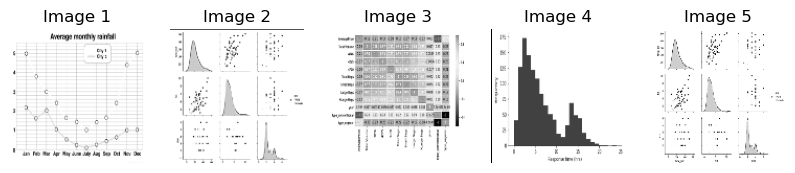

In [95]:
import matplotlib.pyplot as plt
for batch in dataset:
    batch = batch.numpy()  # Convert batch tensor to NumPy
    batch_size = batch.shape[0]  # Number of images in the batch
    plt.figure(figsize=(10, 5))  # Create a figure
    for i in range(batch_size):
        plt.subplot(1, batch_size, i + 1)  # Create subplot for each image
        plt.imshow(batch[i, :, :, 0], cmap='gray')  # Display grayscale image
        plt.title(f"Image {i + 1}")
        plt.axis('off')  # Hide axes
    plt.show()

#### Chaining Methods

In [105]:
X = tf.constant([[1,2],[4,5],[4,3]], dtype= tf.int32)
y = tf.constant([1,2,3], dtype= tf.int32)
print(X.shape)
dataset = (
    tf.data.Dataset.from_tensor_slices((X, y))
    .shuffle(buffer_size=100)
    .batch(32)
    .prefetch(tf.data.AUTOTUNE) #Action: Preloads data (e.g., the next batch) into memory while the current batch is being processed (e.g., by the GPU during training). tf.data.AUTOTUNE dynamically adjusts the number of elements to prefetch.
                                #Example: While the model trains on the first batch, the next batch (e.g., the remaining elements) is preloaded.
)


(3, 2)


In [107]:
for i, j in dataset:
    print(f"{i.numpy()} {j.numpy()}")

[[4 5]
 [4 3]
 [1 2]] [2 3 1]


## 🔹 3. Building Models with tf.keras (Sequential & Functional API)

### 🧩 What is the Sequential API?
#### ✅ Description:
- The Sequential API is used to create models layer-by-layer in a straight line. You add one layer at a time, and the output of one layer is the input of the next.

#### ✅ When to Use:
- You’re building a linear stack of layers.
- The model has one input and one output.
- No layer needs to branch, merge, or share connections.

### 🔧 What is the Functional API?
#### ✅ Description:
- The Functional API allows more flexibility and control than Sequential. You define inputs and connect them to outputs through layers explicitly, enabling non-linear architectures.

#### ✅ When to Use:
- Models with multiple inputs or outputs.
- Models with branching, skip connections, or shared layers (like ResNet, Inception).
- You want more custom architectures or reusability.

### 🔍 Key Differences
| Feature                | Sequential API          | Functional API          |
|------------------------|-------------------------|-------------------------|
| Architecture Type      | Linear stack of layers  | Flexible graph of layers|
| Multiple Inputs/Outputs| ❌ Not supported        | ✅ Supported            |
| Skip Connections       | ❌ Not supported        | ✅ Supported            |
| Layer Reuse            | ❌ Difficult            | ✅ Easy                 |
| Readability            | ✅ Easy for simple models| ⚠️ More verbose, but scalable |
| Use Cases              | Simple models (MLP, basic CNNs) | Complex models (ResNet, multi-input/output) |

### 🧠 Analogy
- **Sequential API** is like stacking blocks in a straight line.
- **Functional API** is like drawing a flowchart where you can fork, merge, or reuse parts.

### 💡 Real-Life Use Cases
| Model Type                  | Preferred API |
|-----------------------------|---------------|
| Simple image classifier     | Sequential    |
| Siamese network             | Functional    |
| Autoencoder                 | Functional    |
| ResNet/Inception            | Functional    |
| Multimodal input (text + image) | Functional |

### Sequential API

In [58]:
from tensorflow.keras import layers, models
import numpy as np

In [76]:
x = np.random.rand(100,100)
y = np.random.choice([1,0],100)

In [71]:
print(x.shape,  y.shape)
print(type(x))

(100, 100) (100,)
<class 'numpy.ndarray'>


In [72]:
model = models.Sequential([
    layers.Dense(32,activation='relu', input_shape = (100,)),
    layers.Dense(2,activation='softmax')
])

c:\Users\omarb\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [79]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x, y, epochs=100) # x should be 2D not 1D

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 0s/step - accuracy: 0.9693 - loss: 0.2522   
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.9416 - loss: 0.2492  
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9343 - loss: 0.2453 
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9663 - loss: 0.2274 
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9599 - loss: 0.2363 
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.9694 - loss: 0.2271  
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9600 - loss: 0.2242 
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9444 - loss: 0.2354 
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9757 - loss: 0.2146 
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9745 - loss: 0.2181 
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9818 - loss: 0.1993 
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9538 - lo

### Functional API

In [43]:
from tensorflow.keras import Model, Input

In [78]:
inputs = Input(shape=(100,))
z = layers.Dense(32,activation='relu')(inputs)
outputs = layers.Dense(2,activation='softmax')(z)

model = Model(inputs = inputs, outputs= outputs)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Use only the first feature to match input shape (None, 1)
model.fit(x, y, epochs=100)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5035 - loss: 0.7017
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5653 - loss: 0.7055 
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5428 - loss: 0.6906 
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.5601 - loss: 0.6891  
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.5992 - loss: 0.6834  
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.5870 - loss: 0.6722  
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5994 - loss: 0.6673 
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6043 - loss: 0.6729 
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.6305 - loss: 0.6474  
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.6332 - loss: 0.6495  
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6074 - loss: 0.6487 
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6602 - loss